# Prueba

## Preparación del Notebook

### Importación de Librerías

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import opendatasets as od

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
#from sklearn.metrics import accuracy_scor

### Descarga de Datasets desde Kaggle

In [2]:
od.download("https://www.kaggle.com/c/titanic/data")
{"username":"dgrone","key":"8e16739c70ce24ea1e6d9a45b61e9796"}

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


{'username': 'dgrone', 'key': '8e16739c70ce24ea1e6d9a45b61e9796'}

### Carga de Datasets

In [3]:
#train_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/train.csv"
train_folder = "titanic/train.csv"
train_df = pd.read_csv(train_folder)

In [4]:
#test_folder = "c:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/03-MLA/titanic/test.csv"
test_folder = "titanic/test.csv"
test_df = pd.read_csv(test_folder)

## 1.- Limpieza de Datos

### 1.1.- Dataset de Entrenamiento

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df = train_df.rename(columns = {'Pclass' : 'TicketClass'})

In [7]:
train_df = train_df.drop(['Name','Ticket','Fare','Cabin','Embarked','Age'],axis =1)

In [8]:
#Importing LabelEncoder from Sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()

In [9]:
# Transforming sex column values using label Encoder
train_df.iloc[:,3]  = label_encoder_sex.fit_transform(train_df.iloc[:,3])

In [10]:
#Reordenamiento del dataframe para dejar la variable objetivo al final
train_df = train_df[['PassengerId','Sex','SibSp','Parch','TicketClass','Survived']]
train_df

,PassengerId,Sex,SibSp,Parch,TicketClass,Survived
0,1,1,1,0,3,0
1,2,0,1,0,1,1
2,3,0,0,0,3,1
3,4,0,1,0,1,1
4,5,1,0,0,3,0
...,...,...,...,...,...,...
886,887,1,0,0,2,0
887,888,0,0,0,1,1
888,889,0,1,2,3,0
889,890,1,0,0,1,1


In [11]:
train_data = train_df.iloc[:,0:5]   
train_target = train_df.iloc[:,5]      

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(X_train)


In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers, optimizers, regularizers

In [13]:
classifier = Sequential()

In [14]:
#Input layer with 5 inputs neurons
classifier.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
#Hidden layer
classifier.add(Dense(2, kernel_initializer = 'uniform', activation = 'relu'))
#output layer with 1 output neuron which will predict 1 or 0
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# train the parameters
history = classifier.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = classifier.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = classifier.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [15]:
# para poner nombres
features = train_df.columns.values
features

array(['PassengerId', 'Sex', 'SibSp', 'Parch', 'TicketClass', 'Survived'],
      dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

## Separacion tradicional
X_train, X_test, y_train, y_test = train_test_split(train_data,
                                                    train_target,test_size=0.3,random_state=123)

## Estandarizado, no normalizado!
scaler = StandardScaler()
scaler.fit(train_data)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [17]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
                     
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 7            # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update


Epoch 1/10
39/39 [==============================] - 1s 4ms/step - loss: 2.1324 - accuracy: 0.6324
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 1.1991 - accuracy: 0.6806
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.7801
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.7673
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7769
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7849
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7560
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7881
Epoch 9/10
39/39 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7881
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.7836
Training accuracy: 0.

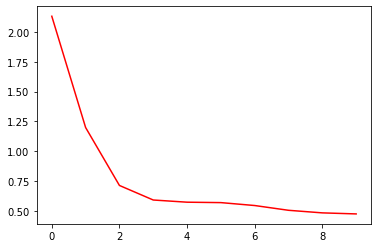

In [18]:
# create a seModeloquential model



## Viene de KERAS!
model = models.Sequential()

# Primera capa oculta de 20 nodos
model.add(Dense(input_dim=len(features)-1,
                       units=hidden_units, 
                       activation=activation))

# Primera capa oculta de 20 nodos
model.add(Dense(input_dim=hidden_units,
                       units=hidden_units, 
                       activation=activation))

# final de la red, outputs
model.add(Dense(input_dim=hidden_units,
                       units=1,
                       activation='relu'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()